In [1]:
import os                   #trabalhar com os arquivos
import numpy as np          #analise dos dados 
import pandas as pd         #analise dos dados
import seaborn as sns       #gerando grafico
from scipy import stats
from meus.printer import *
from datetime import datetime  #modificando datas
import matplotlib.pyplot as plt #gerando grafico

data = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)
data

'2020-4-24'

In [2]:
os.chdir('E:\\OneDrive\\Programação\\python\\covid\\data\\results')
directory = os.listdir('..')
printLis(directory)

-------------
-=< Lista >=-
-------------
0 -> .ipynb_checkpoints
1 -> .~lock.covid19_municipios.csv#
2 -> artigo
3 -> caso_full.csv
4 -> cities.csv
5 -> covid19_municipios.csv
6 -> COVID19_REGIOES BR.csv
7 -> Dados_demográficos_municípios.xlsx
8 -> Dados_demográficos_municípios_new.xlsx
9 -> Datalab_COVID.pptx
10 -> figures
11 -> idade.xlsx
12 -> obito_cartorio.csv
13 -> População residente municipal x população faixa etária.csv
14 -> População residente por estado - 2015.csv
15 -> População residente x sexo.csv
16 -> results


In [7]:
date = 3
df =  pd.read_csv('..\\'+directory[date])
df.tail()

,city,city_ibge_code,date,estimated_population_2019,is_repeated,is_last,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,place_type,state,new_confirmed,new_deaths
26577,NaN,43.0,2020-04-22,11377239.0,False,True,970,8.52579,2020-04-22,0.0289,28,state,RS,52,1
26578,NaN,42.0,2020-04-22,7164788.0,False,True,1115,15.56222,2020-04-22,0.0350,39,state,SC,24,2
26579,NaN,28.0,2020-04-22,2298696.0,False,True,118,5.13335,2020-04-22,0.0593,7,state,SE,1,0
26580,NaN,35.0,2020-04-22,45919049.0,False,True,15914,34.65664,2020-04-22,0.0713,1134,state,SP,529,41
26581,NaN,17.0,2020-04-22,1572866.0,False,True,37,2.35239,2020-04-22,0.0541,2,state,TO,1,0


In [8]:
# df_cities = pd.DataFrame()
# g_population = df.groupby('city')
# df_cities['City'] = g_population.sum().index
# df_cities['Population'] = g_population['estimated_population_2019'].median().values
# df_cities['Confirmed'] = g_population['last_available_confirmed'].sum().values
# df_cities['Deaths'] = g_population['last_available_deaths'].sum().values
# df_cities['Confirmed/100k'] = g_population['last_available_confirmed_per_100k_inhabitants'].sum().values
# df_cities['Death rate'] = g_population['last_available_death_rate'].sum().values
# df = df_cities
# df.head()

In [9]:
df = df[(df['date'] == '2020-04-10') & (df['place_type'] == 'city')][[
    "estimated_population_2019",
    "last_available_confirmed",
    "last_available_deaths",
    "last_available_confirmed_per_100k_inhabitants",
    "last_available_death_rate",
    "city"
]]
df = df.rename(columns={
    "estimated_population_2019": "Population",
    "last_available_confirmed": "Confirmed",
    "last_available_deaths": "Deaths",
    "last_available_confirmed_per_100k_inhabitants": "Confirmed-100k",
    "last_available_death_rate": "Death Rate",
    "city": "City"
})
df.head()

,Population,Confirmed,Deaths,Confirmed-100k,Death Rate,City
10115,15256.0,9,0,58.99318,NaN,Acrelândia
10116,10266.0,1,0,9.74089,NaN,Bujari
10117,19761.0,4,0,20.24189,NaN,Plácido de Castro
10118,18504.0,1,0,5.40424,NaN,Porto Acre
10119,407319.0,55,2,13.50293,0.0364,Rio Branco


In [6]:
df['City'].to_csv('cities.csv', header=['City'])

In [74]:
g = 1
print_campo = 'n'
col1 = 'Confirmed-100k'
col2 = 'Deaths'
try:
    os.mkdir(col2)
    print('Directory created')
except FileExistsError:
    print('Directory already exists')

Directory already exists


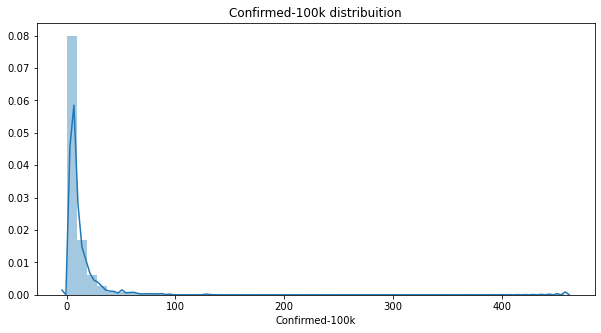

In [75]:
g += 1
plt.figure(figsize=(10, 5))
sns.distplot(
    df[col1].dropna()
)
plt.title(col1 + ' distribuition')
if print_campo == 's':
    plt.savefig('0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

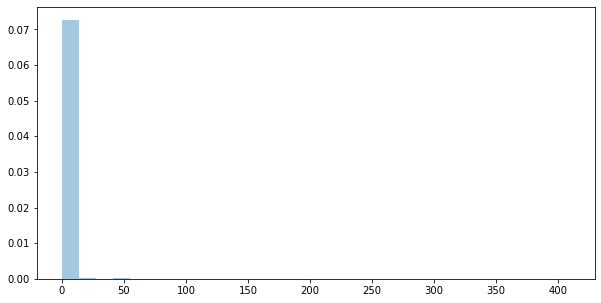

In [76]:
g += 1
plt.figure(figsize=(10, 5))
sns.distplot(
    df[col2].dropna()
)
plt.title(col2 + ' distribuition')
if print_campo == 's':
    plt.savefig('0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

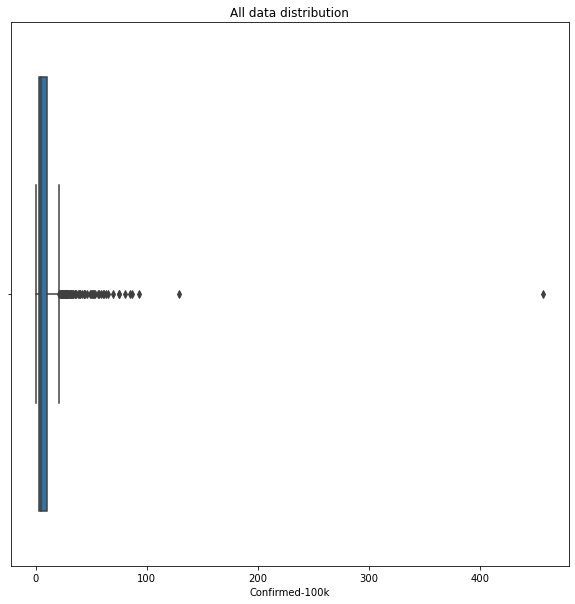

In [77]:
g += 1
plt.figure(figsize=(10, 10))
sns.boxplot(
    x=col1,
    data=df
)
plt.title('All data distribution')
if print_campo == 's':
    plt.savefig('0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

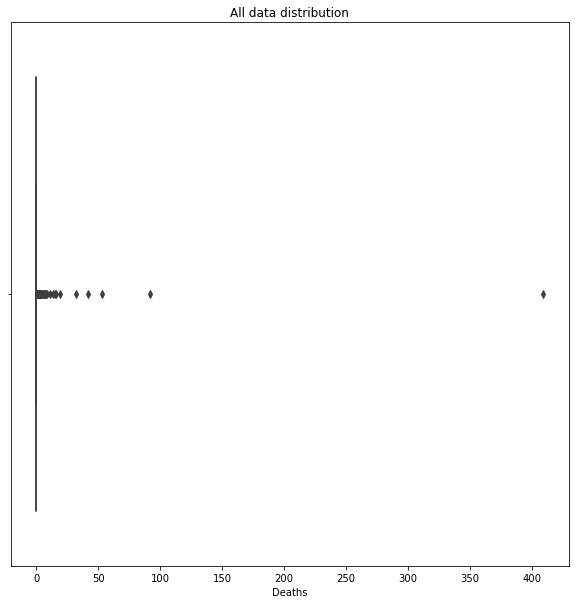

In [78]:
g += 1
plt.figure(figsize=(10, 10))
sns.boxplot(
    x=col2,
    data=df
)
plt.title('All data distribution')
if print_campo == 's':
    plt.savefig('0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

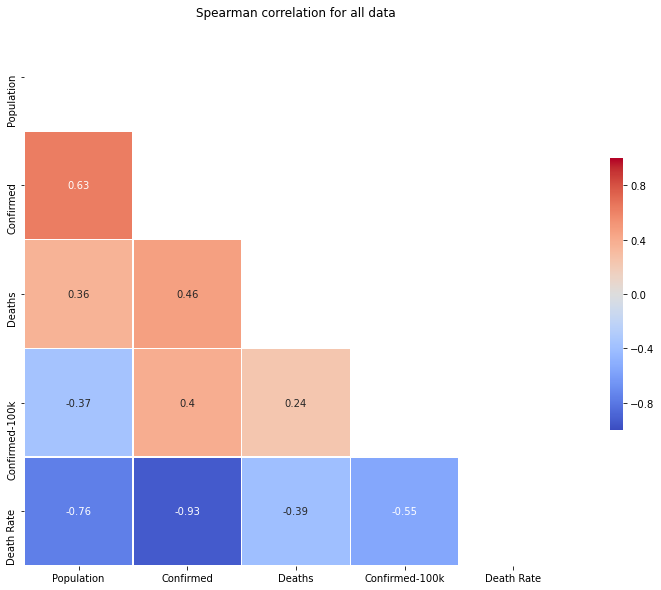

In [79]:
g += 1
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True
)
plt.title('Spearman correlation for all data')
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

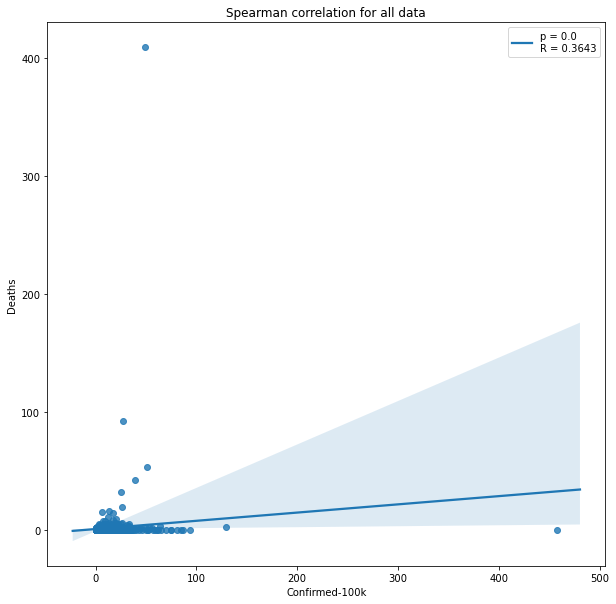

In [80]:
g += 1
df_mold = df.dropna()
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df
)
plt.title('Spearman correlation for all data')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

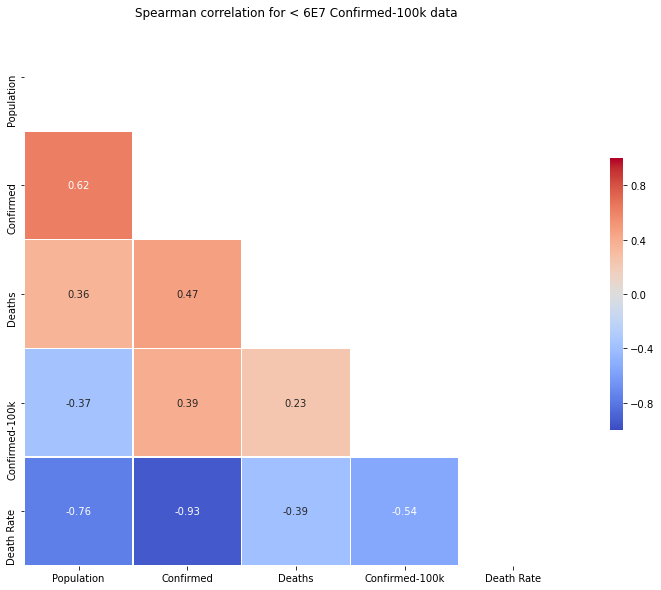

In [81]:
g += 1
df_mod = df[df['Population'] < 6000000]
corr = df_mod.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True
)
plt.title('Spearman correlation for < 6E7 '+col1+' data')
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

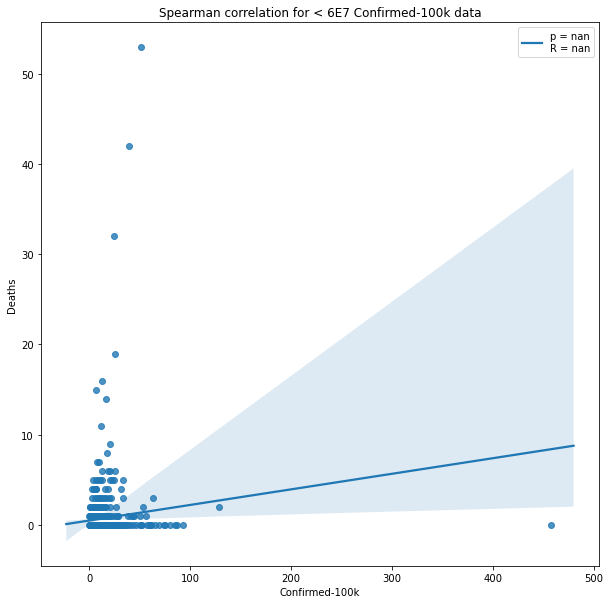

In [82]:
g += 1
df_mold = df_mod
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation for < 6E7 '+col1+' data')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

In [83]:
minimus = df[col1].min()
maximus = df[col1].max()
q2 = df[col1].median()
q1 = df[df[col1] < q2][col1].median()
q3 = df[df[col1] > q2][col1].median()
qi = q3 - q1
minor = q1 - (qi * 1.5)
major = q3 + (qi * 1.5)
list_quartil = {
    'minimus': minimus,
    'minor': minor,
    'q1': q1,
    'q2': q2,
    'q3': q3,
    'major': major,
    'maximus': maximus,
    'qi': qi
}
for k, v in list_quartil.items():
    print(f'{k} - {v}')

minimus - 0.2443
minor - -8.757359999999998
q1 - 2.54469
q2 - 5.01655
q3 - 10.07939
major - 21.381439999999998
maximus - 457.36687
qi - 7.5347


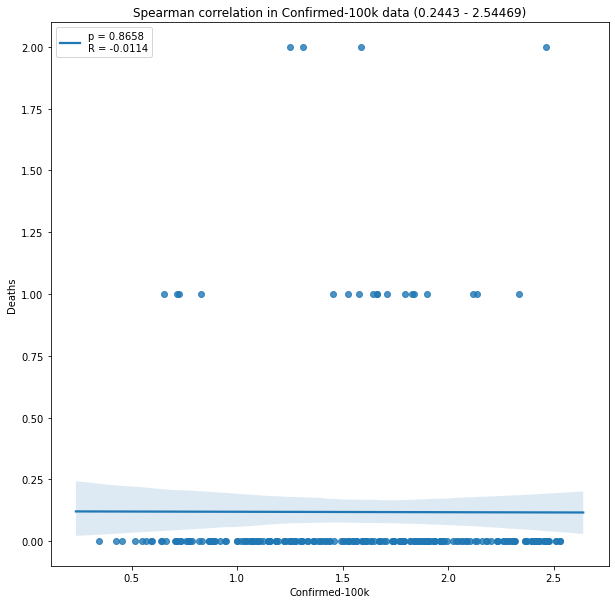

In [84]:
g += 1
inic = minimus
end = q1
df_mold = df[(df[col1] > inic) & (df[col1] < end)]
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation in '+col1+' data (' + str(inic) + ' - ' + str(end) + ')')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

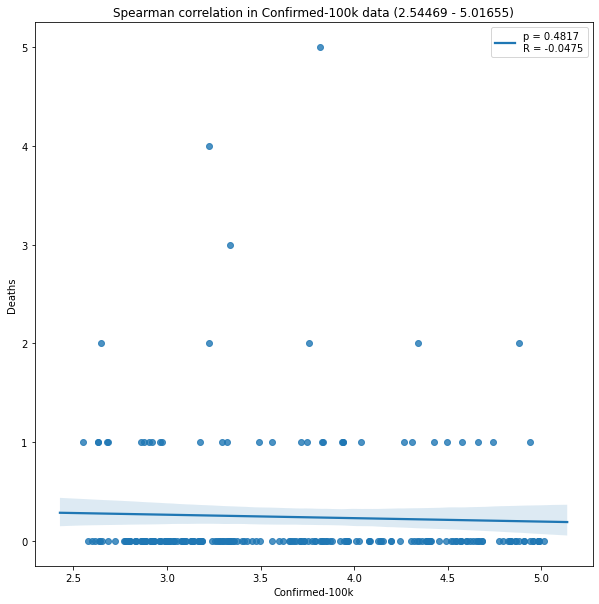

In [85]:
g += 1
inic = q1
end = q2
df_mold = df[(df[col1] > inic) & (df[col1] < end)]
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation in '+col1+' data (' + str(inic) + ' - ' + str(end) + ')')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

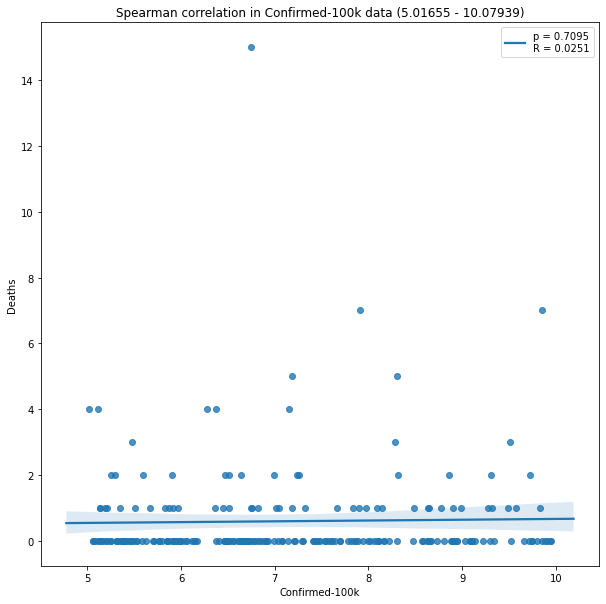

In [86]:
g += 1
inic = q2
end = q3
df_mold = df[(df[col1] > inic) & (df[col1] < end)]
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation in '+col1+' data (' + str(inic) + ' - ' + str(end) + ')')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

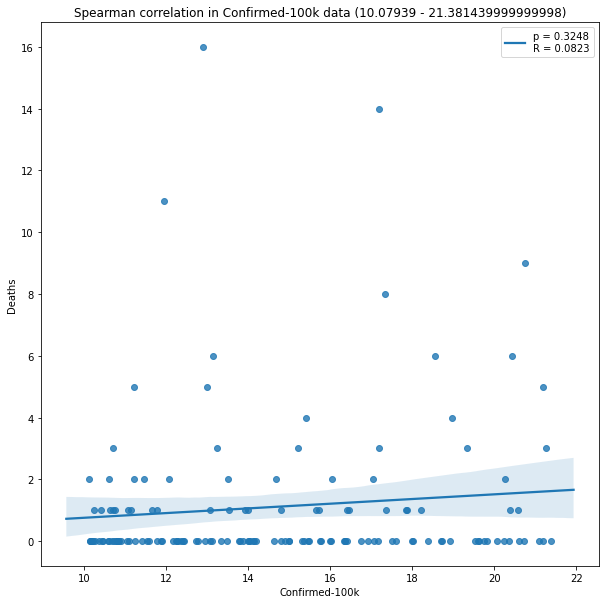

In [87]:
g += 1
inic = q3
end = major
df_mold = df[(df[col1] > inic) & (df[col1] < end)]
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation in '+col1+' data (' + str(inic) + ' - ' + str(end) + ')')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)

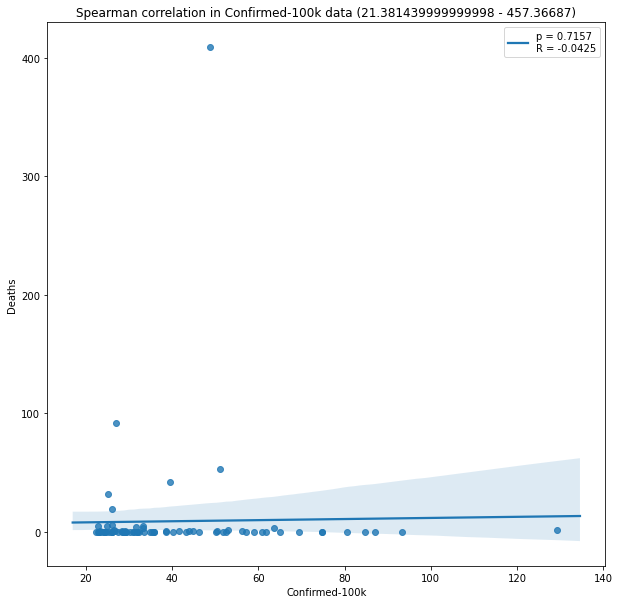

In [88]:
g += 1
inic = major
end = maximus
df_mold = df[(df[col1] > inic) & (df[col1] < end)]
pear_pos = stats.spearmanr(df_mold[col1], df_mold[col2])
plt.figure(figsize=(10, 10))
sns.regplot(
    x=col1,
    y=col2,
    data=df_mold
)
plt.title('Spearman correlation in '+col1+' data (' + str(inic) + ' - ' + str(end) + ')')
plt.legend([
    'p = ' + str(round(pear_pos[1], 4)) + '\nR = ' + str(round(pear_pos[0], 4))
])
if print_campo == 's':
    plt.savefig(col2+'\\0'+str(g)+'-'+col2+'_'+data+'.png', dpi=150)